# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#units and base url
units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Cloudiness":[]
})

print("Beginning Data Retrieval")
print("-------------------------------")

count = 1

for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units={units}"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        cty_cloud = weather_json["clouds"]["all"]
        cty_cntry = weather_json["sys"]["country"]
        cty_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        cty_humid = weather_json["main"]["humidity"]
        cty_lat = weather_json["coord"]["lat"]
        cty_long = weather_json["coord"]["lat"]
        cty_mx_tmp = weather_json["main"]["temp_max"]
        cty_wndspd = weather_json["wind"]["speed"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":cty_cntry,
            "Latitude":cty_lat,
            "Longitude":cty_long,
            "Date":cty_date,
            "Temperature":cty_mx_tmp, 
            "Humidity":cty_humid,
            "Wind Speed":cty_wndspd,
            "Cloudiness":cty_cloud
        }, ignore_index=True)
        count+=1
    except:
        print("City not found. Skipping..")
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | stornoway
City not found. Skipping..
Processing Record 1 of Set 1 | zwedru
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping..
Processing Record 4 of Set 1 | ozark
Processing Record 5 of Set 1 | cadillac
Processing Record 6 of Set 1 | santa fe
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | kamaishi
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | umm lajj
Processing Record 13 of Set 1 | amzya
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping..
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | requena
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping..
Processing Record 16 of Set 1 | rio gallegos
Processing Record 17 of 

Processing Record 166 of Set 1 | frankenberg
Processing Record 167 of Set 1 | shimoda
Processing Record 168 of Set 1 | popondetta
Processing Record 169 of Set 1 | labutta
City not found. Skipping..
Processing Record 169 of Set 1 | tazovskiy
Processing Record 170 of Set 1 | wanning
Processing Record 171 of Set 1 | bambous virieux
Processing Record 172 of Set 1 | humen
Processing Record 173 of Set 1 | auki
Processing Record 174 of Set 1 | hermanus
Processing Record 175 of Set 1 | vila velha
Processing Record 176 of Set 1 | amapa
Processing Record 177 of Set 1 | east london
Processing Record 178 of Set 1 | warrnambool
Processing Record 179 of Set 1 | peniche
Processing Record 180 of Set 1 | jolo
Processing Record 181 of Set 1 | obukhiv
Processing Record 182 of Set 1 | tessalit
Processing Record 183 of Set 1 | tonantins
Processing Record 184 of Set 1 | deputatskiy
Processing Record 185 of Set 1 | faanui
Processing Record 186 of Set 1 | kaitangata
Processing Record 187 of Set 1 | skjervoy
P

Processing Record 325 of Set 1 | banda aceh
Processing Record 326 of Set 1 | dunedin
Processing Record 327 of Set 1 | san rafael
Processing Record 328 of Set 1 | kramat
Processing Record 329 of Set 1 | sawakin
Processing Record 330 of Set 1 | college
Processing Record 331 of Set 1 | abu samrah
Processing Record 332 of Set 1 | constantine
Processing Record 333 of Set 1 | olafsvik
City not found. Skipping..
Processing Record 333 of Set 1 | ampanihy
Processing Record 334 of Set 1 | outlook
Processing Record 335 of Set 1 | cuamba
Processing Record 336 of Set 1 | coihaique
Processing Record 337 of Set 1 | chokurdakh
Processing Record 338 of Set 1 | port saint lucie
Processing Record 339 of Set 1 | trojes
Processing Record 340 of Set 1 | bolungarvik
City not found. Skipping..
Processing Record 340 of Set 1 | russell
Processing Record 341 of Set 1 | grand gaube
Processing Record 342 of Set 1 | kupang
Processing Record 343 of Set 1 | samusu
City not found. Skipping..
Processing Record 343 of S

Processing Record 496 of Set 1 | kollumerland
City not found. Skipping..
Processing Record 496 of Set 1 | saint-francois
Processing Record 497 of Set 1 | yorkton
Processing Record 498 of Set 1 | lancaster
Processing Record 499 of Set 1 | mao
Processing Record 500 of Set 1 | antalaha
Processing Record 501 of Set 1 | nicoya
Processing Record 502 of Set 1 | itarema
Processing Record 503 of Set 1 | mongo
Processing Record 504 of Set 1 | mandera
Processing Record 505 of Set 1 | lamidan
City not found. Skipping..
Processing Record 505 of Set 1 | svetlyy
City not found. Skipping..
Processing Record 505 of Set 1 | mutsamudu
City not found. Skipping..
Processing Record 505 of Set 1 | vagur
Processing Record 506 of Set 1 | alyangula
Processing Record 507 of Set 1 | ossora
Processing Record 508 of Set 1 | plaeng yao
Processing Record 509 of Set 1 | east massapequa
Processing Record 510 of Set 1 | yenotayevka
Processing Record 511 of Set 1 | andevoranto
City not found. Skipping..
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Cloudiness
0,zwedru,LR,6.07,6.07,2019-03-01,75.58,73.0,7.38,0.0
1,taltal,CL,-25.41,-25.41,2019-03-01,63.83,75.0,2.57,8.0
2,kodiak,US,39.95,39.95,2019-03-01,36.00,29.0,4.70,1.0
3,ozark,US,37.02,37.02,2019-03-01,37.99,83.0,2.91,90.0
4,cadillac,US,44.25,44.25,2019-03-01,32.00,71.0,2.35,90.0


In [26]:
weather_df.count()

City Name      539
Country        539
Latitude       539
Longitude      539
Date           539
Temperature    539
Humidity       539
Wind Speed     539
Cloudiness     539
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

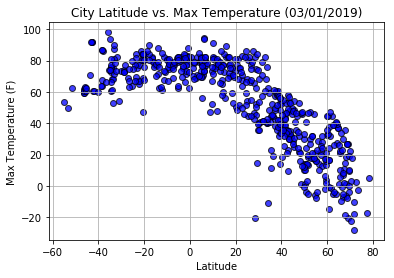

We can see that during this time of the year, latidues below the equator have warmer temperatures due to the tilt of the Earth, while latitudes above the equator experience lower temperatures


In [31]:
# Obtain the x and y coordinates for latitude and temperature
x_lat = weather_df["Latitude"]
y_temp = weather_df["Temperature"]


# Build the scatter plot
plt.scatter(x_lat, y_temp, color=["blue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (03/01/2019)")

plt.show()
print("We can see that during this time of the year, latidues below the equator have warmer temperatures due to the tilt of the Earth, while latitudes above the equator experience lower temperatures")

#### Latitude vs. Humidity Plot

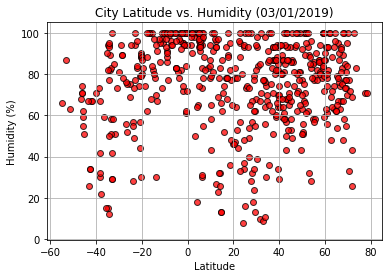

This graph shows us that humidity is usually above 40% for all latitudes


In [33]:
# Obtain the x and y coordinates for latitude and humidity
x_lat = weather_df["Latitude"]
y_humid = weather_df["Humidity"]


# Build the scatter plot
plt.scatter(x_lat, y_humid, color=["red"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (03/01/2019)")
plt.ylim(-0.25, 105)

plt.show()
print("This graph shows us that humidity is usually above 40% for all latitudes")

#### Latitude vs. Cloudiness Plot

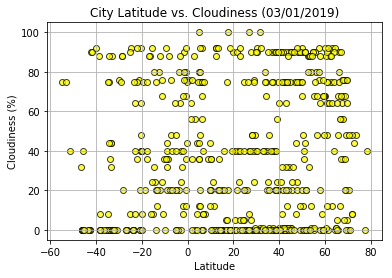

There is no real correlation between latitude and cloudiness


In [34]:
# Obtain the x and y coordinates for latitude and cloudiness
x_lat = weather_df["Latitude"]
y_cloud = weather_df["Cloudiness"]


# Build the scatter plot
plt.scatter(x_lat, y_cloud, color=["yellow"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/01/2019)")

plt.show()
print("There is no real correlation between latitude and cloudiness")

#### Latitude vs. Wind Speed Plot

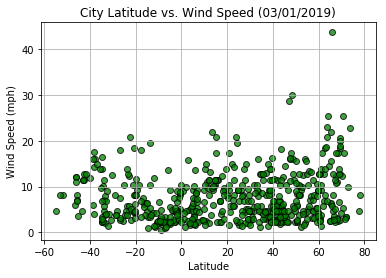

The graph shows that wind speed is usually between 0 to 20mph for all latitudes, with only some expeptions that go above 20mph


In [35]:
# Obtain the x and y coordinates for latitude and cloudiness
x_lat = weather_df["Latitude"]
y_wind = weather_df["Wind Speed"]


# Build the scatter plot
plt.scatter(x_lat, y_wind, color=["green"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (03/01/2019)")

plt.show()
print("The graph shows that wind speed is usually between 0 to 20mph for all latitudes, with only some expeptions that go above 20mph")